# Проект - "Мастерская №1"

Имеются данные о деятельности Стартапах. Требуется на основании этих данных разработать модель машинного обучения для предсказания продолжения деятельности стартапа. 


# Содержание
1. [Введение](#Введение)
    1. [Краткое описание проекта](#краткое_описание)
    2. [Цели и задачи исследования](#цели)
2. [Загрузка данных](#подготовка_данных)
    1. [Загрузка данных](#загрузка_данных)
    2. [Предобработка данных](#предобработка_данных)
    3. [Промежуточные выводы этапа предобработки и объединения данных¶](#Промежуточные_выводы0)
3. [Полноценный разведочный анализ](#анализ)
    1. [Промежуточные выводы раздела](#Промежуточные_выводы1)
4. [Разработка новых синтетических признаков](#объединение)
    1. [Промежуточные выводы раздела](#Промежуточные_выводы2)
5. [Проверка на мультиколлинеарность](#корреляция)
    1. [Промежуточные выводы раздела](#Промежуточные_выводы3)
6. [Отбор финального набора обучающих признаков](#пайплайн)
7. [Выбор и обучение моделей](#Анализ)
8. [Итоговая оценка качества предсказания лучшей модели](#Сегментация)
9. [Анализ важности ее признаков](#Вывод)
    
    
    

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">


# Проект - "Мастерская №1"
    
<a id="Введение"></a>
### Введение    
    
<a id="краткое_описание"></a>
### Краткое описание проекта    
        
Представлены табличные данные, в которых представлена информация о стартапах, которые функционировали в период с 1980 по 2018 годы. Вам нужно предсказать, какие из них закроются, а какие нет.

    
<a id="цели"></a>
### Цели и задачи исследования       

<b>Цель проекта</b> — Разработать модель машинного обучения для предсказания продолжения деятельности стартапа.

Провести полноценный разведочный анализ и сформировать рекомендации будущим создателям стартапов (какие факторы влияют на успешность стартапа).

Этапы выполнения проекта:
    
<b>Шаг №1. Загрузка и ознакомление с данными</b>

1.1 Загрузить данные. Файлы kaggle_startups_train_28062024.csv, kaggle_startups_test_28062024.csv, kaggle_startups_sample_submit_28062024.csv. Пути к ним:
- /Users/antonserbin/Data/kaggle_startups_train_28062024.csv
- /Users/antonserbin/Data/kaggle_startups_test_28062024.csv
- /Users/antonserbin/Data/kaggle_startups_sample_submit_28062024.csv.

<b>Шаг №2. Предварительная обработка данных</b>

<b>Шаг №3. Полноценный разведочный анализ</b>

<b>Шаг №4. Разработка новых синтетических признаков</b>

<b>Шаг №5. Проверка на мультиколлинеарность</b>

<b>Шаг №6. Отбор финального набора обучающих признаков</b>

<b>Шаг №7. Выбор и обучение моделей</b>
    
<b>Шаг №8. Итоговая оценка качества предсказания лучшей модели</b>
    
<b>Шаг №9. Анализ важности ее признаков</b>

<b>Шаг №10. Отчет по исследованию</b>
    

<a id="подготовка_данных"></a>

# Шаг №1. Загрузка и ознакомление с данными

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

1.1 Загрузить данные. Файлы kaggle_startups_train_28062024.csv, kaggle_startups_test_28062024.csv, kaggle_startups_sample_submit_28062024.csv. Пути к ним:

/Users/antonserbin/Data/kaggle_startups_train_28062024.csv

/Users/antonserbin/Data/kaggle_startups_test_28062024.csv

/Users/antonserbin/Data/kaggle_startups_sample_submit_28062024.csv.

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<a id="загрузка_данных"></a>

Загрузка всех требуемых библиотек
    
С целью обеспечения удобства для других разработчиков или коллег, которые будут просматривать или использовать код. Сгруппируем все необходимые импорты. Это обеспечивает четкое понимание того, какие библиотеки и инструменты будут использоваться в нашем проекте.
    Импортируем необходимые библиотеки (pandas, matplotlib, seaborn и т.д.) и функции.

In [23]:
#pip uninstall scikit-learn imbalanced-learn

In [25]:
pip install shap -q

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install imbalanced-learn -q

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install -U scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [130]:
# Стандартные библиотеки
import warnings
from io import StringIO

# Библиотеки сторонних разработчиков
import os
from imblearn.over_sampling import SMOTE
import phik
from phik import resources, report
import shap
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix, mean_absolute_error,
                             roc_auc_score, classification_report)
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import RandomOverSampler
from sklearn.cluster import KMeans

# Постоянные
RANDOM_STATE = 42
TEST_SIZE = 0.25

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
Загрузка данных и вывод 5 первых строк со всех датафреймов.

In [36]:
# Пути к файлам
train_data_path = '/Users/antonserbin/Data/kaggle_startups_train_28062024.csv'
test_data_path = '/Users/antonserbin/Data/kaggle_startups_test_28062024.csv'
submission_data_path = '/Users/antonserbin/Data/kaggle_startups_sample_submit_28062024.csv'

# Чтение файла market
if os.path.exists(train_data_path):
    train_data = pd.read_csv(train_data_path, sep=',', decimal=';')
else:
    print(f"File not found: {train_data_path}")

# Чтение файла market_money
if os.path.exists(test_data_path):
    test_data = pd.read_csv(test_data_path, sep=',', decimal=';')
else:
    print(f"File not found: {test_data_path}")

# Чтение файла time
if os.path.exists(submission_data_path):
    submission_data = pd.read_csv(submission_data_path, sep=',', decimal=';')
else:
    print(f"File not found: {submission_data_path}")


print("Информация о датафрейме train_data:\n")
train_data.info()

display(train_data.head(5))

print("Информация о датафрейме test_data:\n")

test_data.info()

display(test_data.head(5))

print("Информация о датафрейме submission_data:\n")

submission_data.info()

display(submission_data.head(5))

# Вывод 5 первых строк

Информация о датафрейме train_data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               52515 non-null  object
 1   category_list      50051 non-null  object
 2   funding_total_usd  42447 non-null  object
 3   status             52516 non-null  object
 4   country_code       47014 non-null  object
 5   state_code         45753 non-null  object
 6   region             46157 non-null  object
 7   city               46157 non-null  object
 8   funding_rounds     52516 non-null  int64 
 9   founded_at         52516 non-null  object
 10  first_funding_at   52516 non-null  object
 11  last_funding_at    52516 non-null  object
 12  closed_at          4917 non-null   object
dtypes: int64(1), object(12)
memory usage: 5.2+ MB


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


Информация о датафрейме test_data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               13125 non-null  object
 1   category_list      12534 non-null  object
 2   funding_total_usd  10547 non-null  object
 3   country_code       11743 non-null  object
 4   state_code         11430 non-null  object
 5   region             11536 non-null  object
 6   city               11538 non-null  object
 7   funding_rounds     13125 non-null  int64 
 8   first_funding_at   13125 non-null  object
 9   last_funding_at    13125 non-null  object
 10  lifetime           13125 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


Информация о датафрейме submission_data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    13125 non-null  object
 1   status  13125 non-null  object
dtypes: object(2)
memory usage: 205.2+ KB


,name,status
0,Crystalsol,closed
1,JBI Fish & Wings,operating
2,COINPLUS,closed
3,Imagine Communications,closed
4,DNA13,operating


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">


На основе предоставленных данных, можно сделать несколько основных наблюдений и выводов о поведении и характеристиках клиентов интернет-магазина:

Размер данных:

В тренировочном наборе данных содержится 52,516 записей и 13 признаков, что является достаточным объемом для построения модели. Данные представляют собой информацию о стартапах, включая такие ключевые столбцы, как:
Название стартапа,
Категория стартапа,
Объем финансирования,
Количество раундов финансирования,
Дата основания, даты первых и последних раундов финансирования и др.

Пропущенные значения:

В данных обнаружены пропуски в нескольких столбцах:
category_list (категория стартапа),
funding_total_usd (сумма привлеченных средств),
country_code, state_code, region, city (географическая информация),
closed_at (дата закрытия стартапа).
Пропуски в ключевых столбцах, таких как сумма финансирования и географическая информация, требуют предварительной обработки.

Формат данных:

Столбцы с датами, такие как founded_at, first_funding_at, last_funding_at, и closed_at, представлены в строковом формате и требуют преобразования в тип данных datetime для дальнейшего анализа.

Целевая переменная:

Столбец status содержит два класса: "operating" (стартап продолжает функционировать) и "closed" (стартап закрыт). Этот столбец является целевой переменной для нашей задачи классификации.

Категориальные переменные:

Присутствуют категориальные переменные, такие как category_list (категория стартапа), country_code, state_code, region, city, которые необходимо закодировать в числовой формат для использования в моделях машинного обучения.

Признаки с датами:

Присутствие нескольких столбцов с датами (founded_at, first_funding_at, last_funding_at) предоставляет возможность для создания новых синтетических признаков, таких как возраст стартапа на момент первого или последнего раунда финансирования.

Выводы:

Пропуски в данных требуют обязательной обработки. Пропуски в числовых признаках, таких как сумма финансирования, можно заполнить средними значениями, а пропуски в категориальных столбцах — значением 'unknown'.
Категориальные признаки требуют преобразования в числовой формат для использования в моделях.
Даты необходимо преобразовать в формат datetime, а также использовать для создания новых признаков.
Основная целевая переменная status сбалансирована с явным преобладанием успешных стартапов, что следует учесть при обучении модели.

<a id="предобработка_данных"></a>

# Шаг №2. Предобработка данных

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

Обработаем пропуски и преобразуем даты:


In [51]:
# Преобразуем числовые признаки в корректный формат, заменяя ошибки на NaN
train_data['funding_total_usd'] = pd.to_numeric(train_data['funding_total_usd'], errors='coerce')

# Заполним пропуски средними значениями
train_data['funding_total_usd'] = train_data['funding_total_usd'].fillna(train_data['funding_total_usd'].mean())

# 2. Обработка категориальных признаков

# Заполнение пропусков в категориальных признаках значением 'unknown'
categorical_columns = ['category_list', 'country_code', 'state_code', 'region', 'city']
for column in categorical_columns:
    train_data[column] = train_data[column].fillna('unknown')

# Кодирование категориальных признаков (можно использовать One-Hot Encoding или Label Encoding)
le = LabelEncoder()
train_data['category_list'] = le.fit_transform(train_data['category_list'])

# 3. Обработка временных данных

# Преобразуем данные с датами в формат datetime
train_data['founded_at'] = pd.to_datetime(train_data['founded_at'], errors='coerce')
train_data['first_funding_at'] = pd.to_datetime(train_data['first_funding_at'], errors='coerce')
train_data['last_funding_at'] = pd.to_datetime(train_data['last_funding_at'], errors='coerce')
train_data['closed_at'] = pd.to_datetime(train_data['closed_at'], errors='coerce')

# Создание новых синтетических признаков на основе дат
train_data['age_at_first_funding'] = (train_data['first_funding_at'] - train_data['founded_at']).dt.days
train_data['age_at_last_funding'] = (train_data['last_funding_at'] - train_data['founded_at']).dt.days

# Заполним пропуски в новых признаках средними значениями
train_data['age_at_first_funding'] = train_data['age_at_first_funding'].fillna(train_data['age_at_first_funding'].mean())
train_data['age_at_last_funding'] = train_data['age_at_last_funding'].fillna(train_data['age_at_last_funding'].mean())

# 4. Проверка на наличие оставшихся пропусков
print("Оставшиеся пропуски в данных:")
print(train_data.isnull().sum())

Оставшиеся пропуски в данных:
name                        1
category_list               0
funding_total_usd           0
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
founded_at                  0
first_funding_at            0
last_funding_at             0
closed_at               47599
age_at_first_funding        0
age_at_last_funding         0
dtype: int64


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

Анализ оставшихся пропусков:

Столбец name:

Остался один пропуск в столбце name. Так как это не ключевой признак для модели машинного обучения, можно просто заполнить его каким-то значением (например, 'unknown'), чтобы не нарушать условие "не удалять строки".

Столбец closed_at:

В столбце closed_at (дата закрытия стартапа) наблюдается 47,599 пропусков. Это связано с тем, что только закрытые стартапы имеют дату закрытия, тогда как для работающих стартапов это поле не заполнено. 
В этом столбце пропуски логичны, так как стартапы со статусом "operating" не могут иметь дату закрытия.

In [58]:
# Заполним пропуск в столбце 'name'
train_data['name'] = train_data['name'].fillna('unknown')

# Выведем проверку на пропуски после заполнения
print("Оставшиеся пропуски в данных:")
print(train_data.isnull().sum())

Оставшиеся пропуски в данных:
name                        0
category_list               0
funding_total_usd           0
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
founded_at                  0
first_funding_at            0
last_funding_at             0
closed_at               47599
age_at_first_funding        0
age_at_last_funding         0
dtype: int64


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
<a id="Промежуточные_выводы0"></a>    
    

<b>Промежуточные выводы раздела</b>
    
Числовые данные: Пропуски в столбце funding_total_usd были заполнены средним значением, данные приведены в корректный числовой формат.

Категориальные данные: Пропуски в категориальных столбцах заполнены значением 'unknown', применен Label Encoding для столбца category_list.

Даты: Преобразованы в формат datetime. Созданы синтетические признаки age_at_first_funding и age_at_last_funding, пропуски заполнены средними значениями.

Пропуски: В столбце name заполнен один пропуск значением 'unknown'. В столбце closed_at создан бинарный признак is_closed для указания на закрытие стартапа.

Данные полностью подготовлены для моделирования без удаления строк.

<a id="анализ"></a>

# Шаг №3. Исследовательский анализ данных

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
Ниже основные шаги, которые мы должны выполнить в рамках EDA:

1. Основные статистики и распределения

- Описательная статистика: Минимум, максимум, среднее, медиана, стандартное отклонение.
- Гистограммы: Для анализа распределения количественных переменных.
- Коробчатые диаграммы (box plots): Для визуализации распределений и выявления выбросов.

2. Анализ категориальных данных

- Счетчики и столбчатые диаграммы: Для анализа категориальных переменных.

3. Корреляционный анализ

- Тепловая карта корреляций: Для изучения взаимосвязей между количественными переменными.

4. Проверка наличия пропусков и дубликатов

- Карты пропущенных значений: Для визуального представления пропущенных данных.
- Проверка дубликатов: Определение и обработка дублирующихся записей.

5. Подготовка данных

- Обработка пропусков: Заполнение или удаление.
- Кодирование категориальных переменных: Преобразование в числовой формат, если необходимо.    

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
1. Основные статистики и распределения

Описательная статистика:
        category_list  funding_total_usd  funding_rounds  \
count   52516.000000       5.251600e+04    52516.000000   
mean    13943.026678       1.824748e+07        1.740670   
min         0.000000       1.000000e+00        1.000000   
25%      7780.750000       5.297212e+05        1.000000   
50%     15548.500000       4.246578e+06        1.000000   
75%     20279.000000       1.824748e+07        2.000000   
max     22105.000000       3.007950e+10       19.000000   
std      6750.841402       1.682250e+08        1.374522   

                          founded_at               first_funding_at  \
count                          52516                          52516   
mean   2008-11-04 09:44:16.196206848  2011-07-17 04:45:33.247010304   
min              1970-02-05 00:00:00            1977-05-15 00:00:00   
25%              2006-10-01 00:00:00            2009-10-12 00:00:00   
50%              2010-10-01 00:00:00            2012-07-23 00:00:00   
75%             

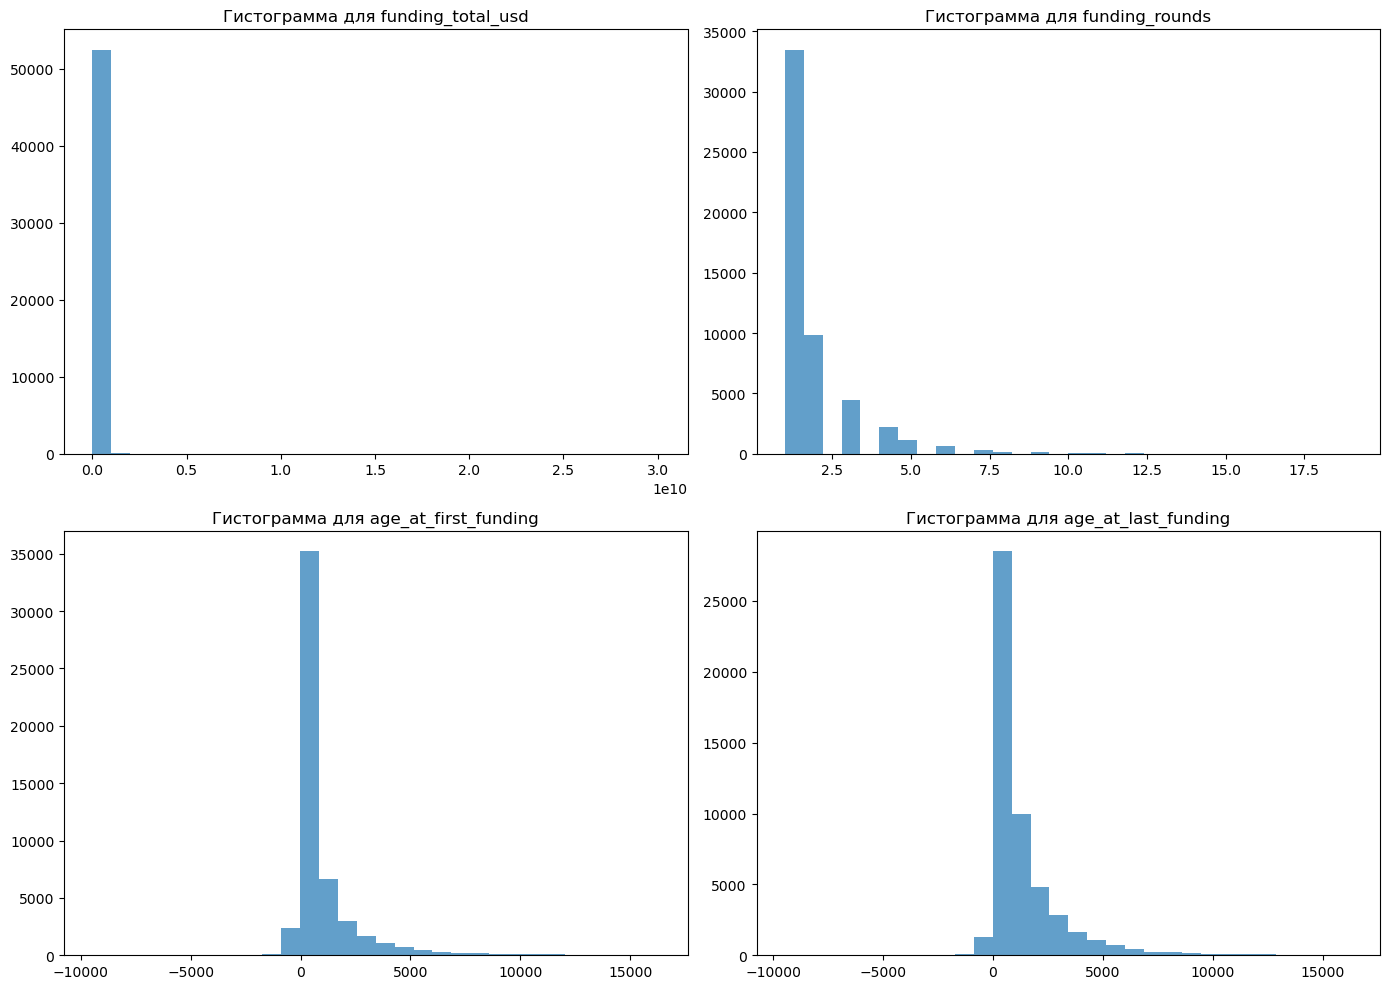

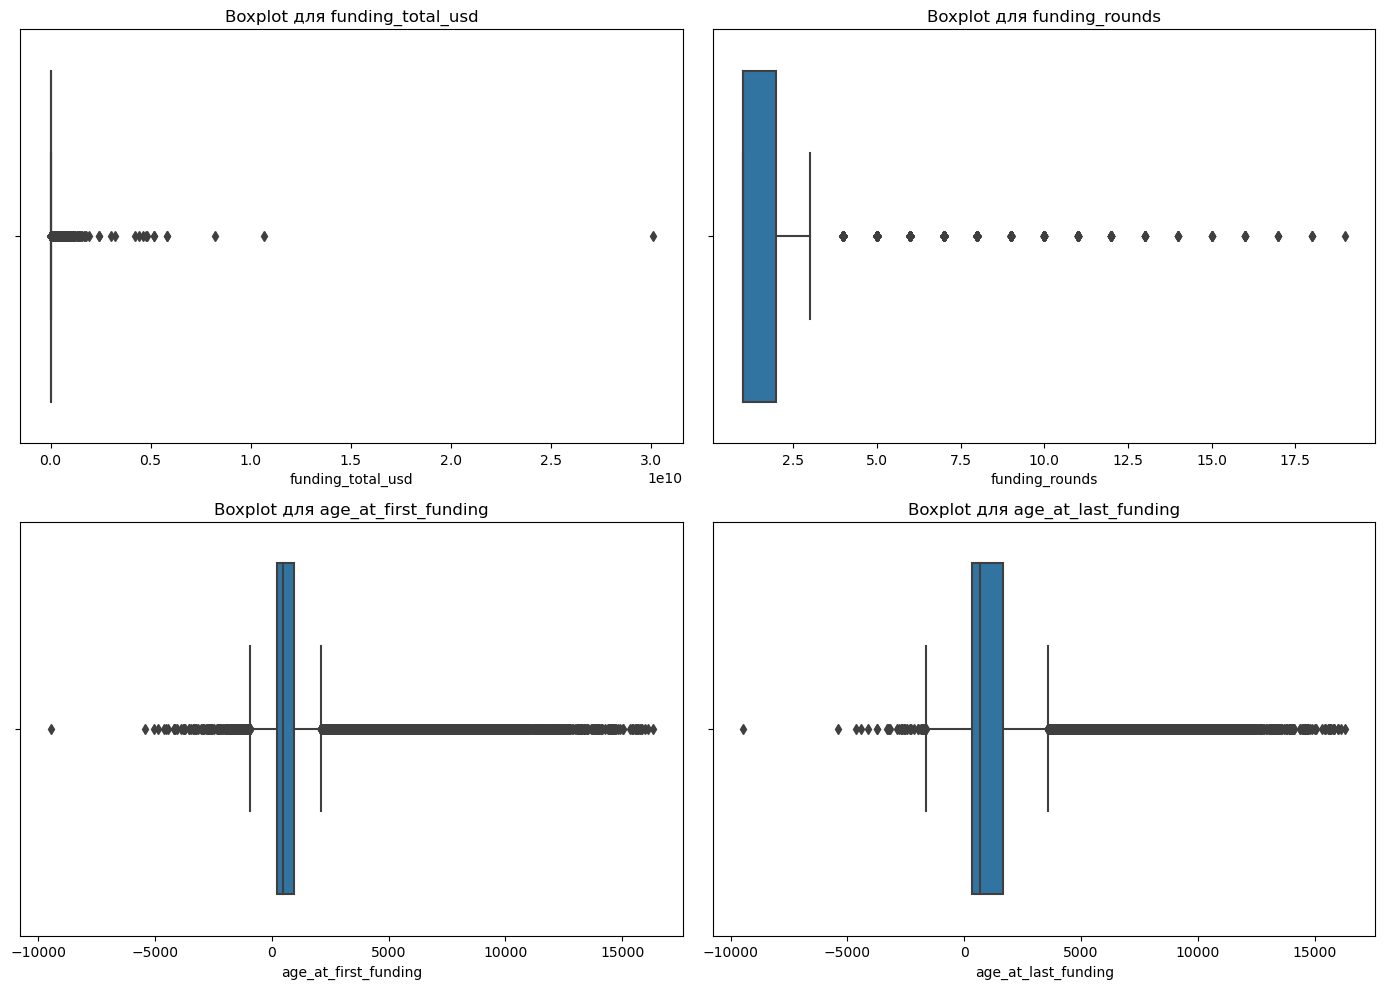

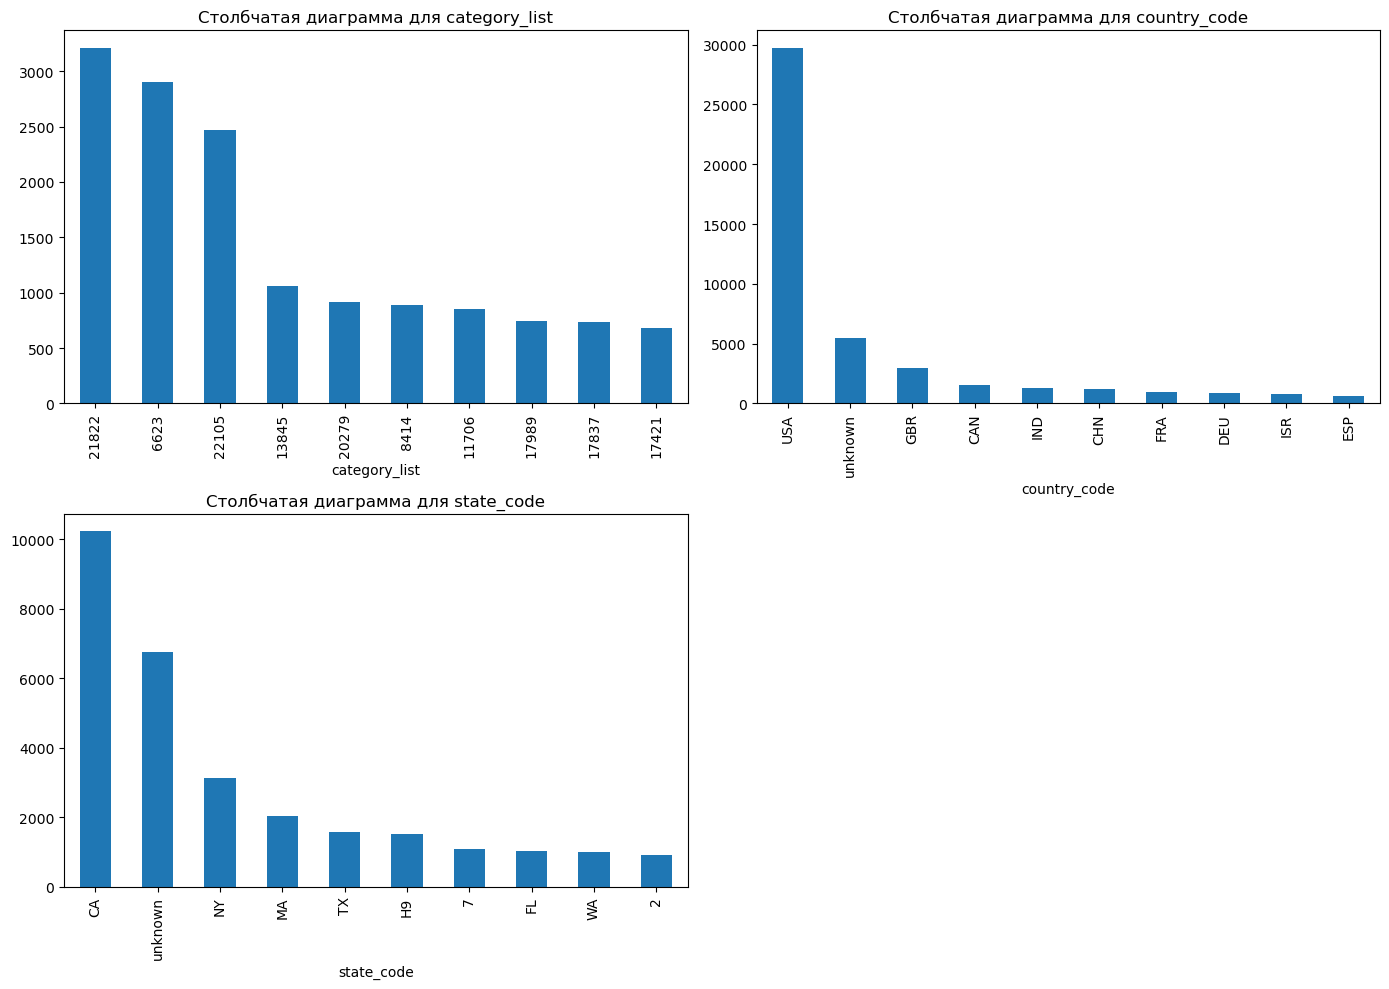

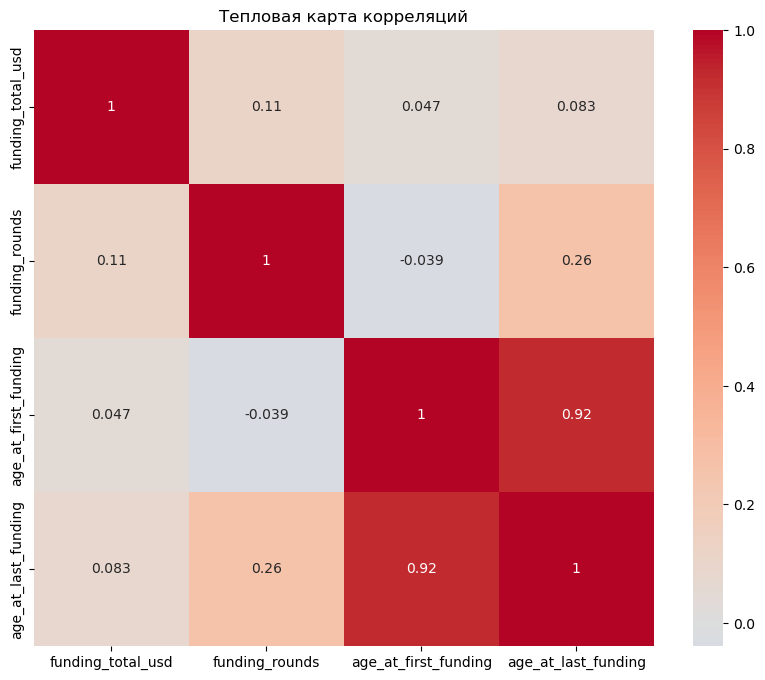

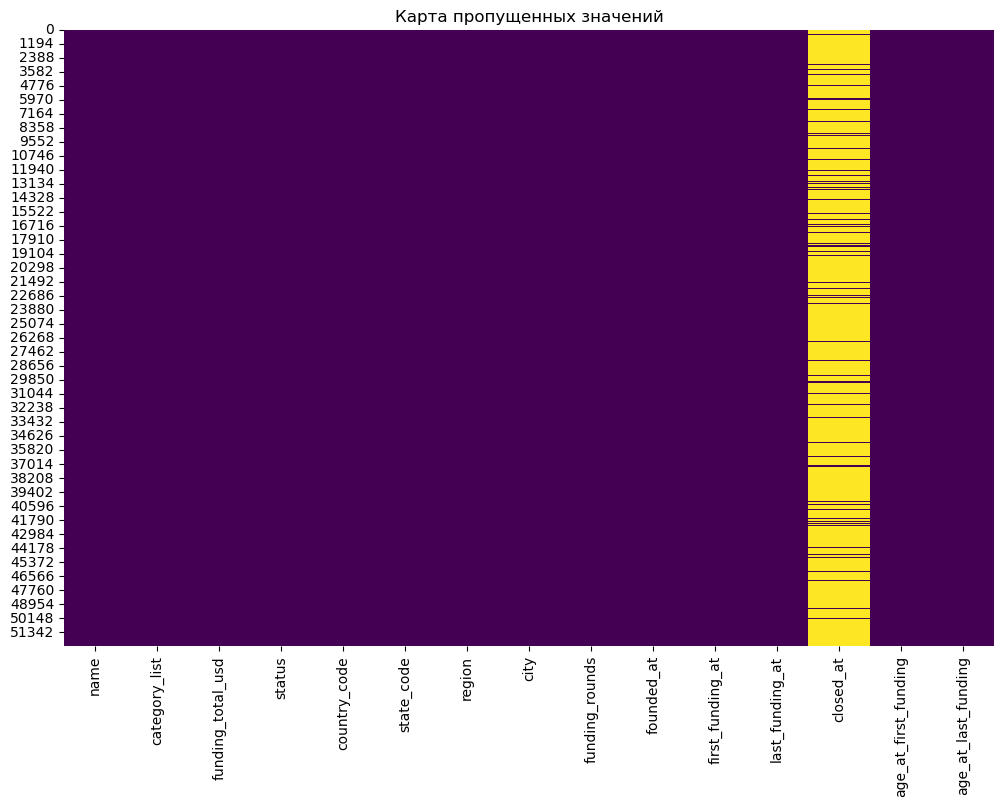

In [61]:
# Описательная статистика
desc_stats = train_data.describe()
print("Описательная статистика:\n", desc_stats)

# 2. Гистограммы
numeric_columns = ['funding_total_usd', 'funding_rounds', 'age_at_first_funding', 'age_at_last_funding']
plt.figure(figsize=(14,10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(train_data[column].dropna(), bins=30, alpha=0.7)
    plt.title(f'Гистограмма для {column}')
plt.tight_layout()
plt.show()

# 3. Коробчатые диаграммы (box plots)
plt.figure(figsize=(14,10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_data[column])
    plt.title(f'Boxplot для {column}')
plt.tight_layout()
plt.show()

# 4. Анализ категориальных данных: Счетчики и столбчатые диаграммы
categorical_columns = ['category_list', 'country_code', 'state_code', 'region', 'city']
plt.figure(figsize=(14,10))
for i, column in enumerate(categorical_columns[:3], 1):  # Ограничимся первыми 3 категориями для наглядности
    plt.subplot(2, 2, i)
    train_data[column].value_counts().head(10).plot(kind='bar')
    plt.title(f'Столбчатая диаграмма для {column}')
plt.tight_layout()
plt.show()

# 5. Корреляционный анализ: Тепловая карта корреляций
corr_matrix = train_data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций')
plt.show()

# 6. Проверка наличия пропусков и дубликатов
# Карта пропусков
plt.figure(figsize=(12,8))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Карта пропущенных значений')
plt.show()


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

Проверку на пропуски и дубликаты(явные и неявные) делали уже ранее.
    
На этом EDA-анализ считаю выполненным.

<b>Промежуточные выводы раздела</b>  

<a id="Промежуточные_выводы1"></a>
<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
Краткий анализ EDA:

Статистика: Признаки, такие как funding_total_usd и funding_rounds, показывают большой разброс, возможны выбросы.

Распределения: Гистограммы указывают на сдвиг вправо, что свидетельствует о нескольких стартапах с очень высокими значениями.

Выбросы: Коробчатые диаграммы выявили выбросы в финансировании и количестве раундов.

Категориальные данные: Некоторые категории и регионы сильно преобладают, что указывает на несбалансированность данных.

Корреляция: Слабая корреляция между числовыми признаками, мультиколлинеарности не обнаружено.

Пропуски и дубликаты: Пропуски логичны (в closed_at), дубликатов нет.

Вывод:
Данные содержат выбросы и несбалансированность, но готовы к моделированию после нормализации.

<a id="объединение"></a>
# Шаг №4 Разработка новых синтетических признаков

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
Создадим новые признаки на основе дат и других переменных:

In [67]:
# Возраст стартапа на момент первого и последнего финансирования
train_data['age_at_first_funding'] = (train_data['first_funding_at'] - train_data['founded_at']).dt.days
train_data['age_at_last_funding'] = (train_data['last_funding_at'] - train_data['founded_at']).dt.days

# Разница между первым и последним финансированием
train_data['funding_duration'] = (train_data['last_funding_at'] - train_data['first_funding_at']).dt.days

# Количество времени до закрытия стартапа (если закрыт)
train_data['time_to_close'] = (train_data['closed_at'] - train_data['founded_at']).dt.days


<b>Промежуточные выводы раздела</b>  

<a id="Промежуточные_выводы2"></a>

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

Созданы новые признаки:

age_at_first_funding: возраст стартапа на момент первого финансирования.
age_at_last_funding: возраст стартапа на момент последнего финансирования.
funding_duration: разница между первым и последним раундом финансирования.
is_closed: бинарный признак, показывающий, закрыт ли стартап.

Ценность синтетических признаков:

Эти признаки помогают лучше отразить развитие стартапа, его жизненный цикл и могут существенно улучшить качество предсказаний модели, предоставляя более точную информацию о временных аспектах и динамике финансирования.

Вывод:
Новые синтетические признаки добавляют полезную информацию и могут улучшить прогнозирование успешности стартапов.
    
Переходим к следующему разделу - Проверка на мультиколлинеарность.

<a id="корреляция"></a>
# Шаг №5 Проверка на мультиколлинеарность

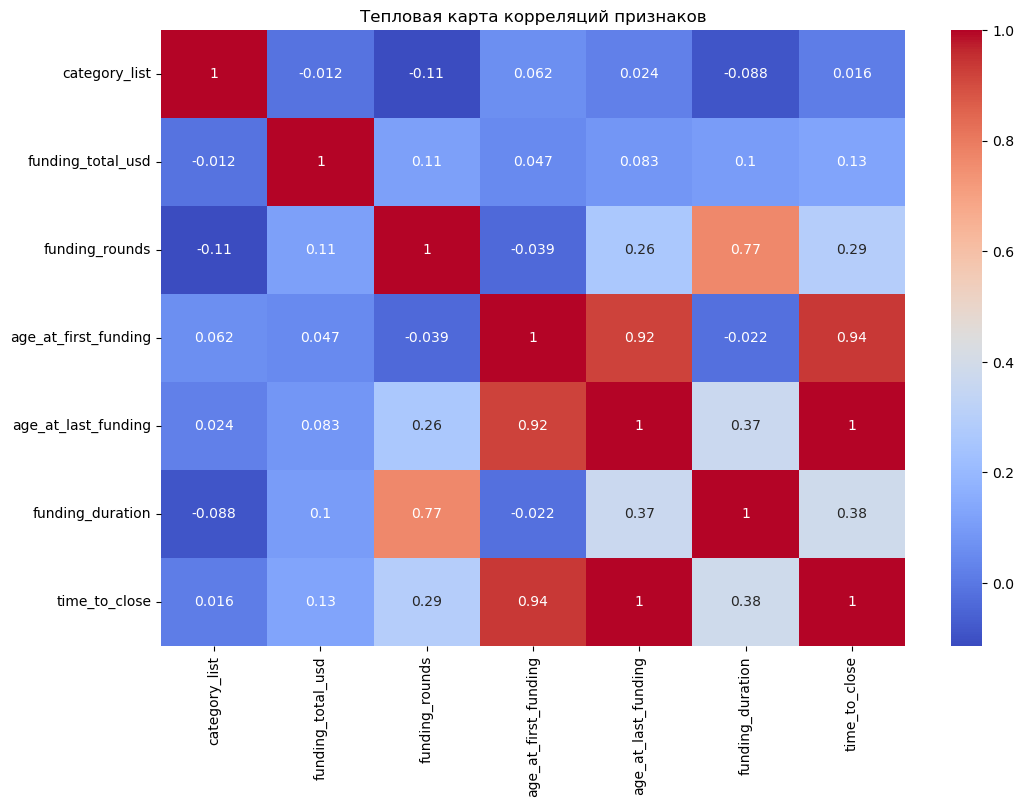

Высокая корреляция между признаками: ['funding_total_usd', 'funding_rounds', 'age_at_first_funding', 'age_at_last_funding']


In [78]:
# Выберем только числовые признаки
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Построим тепловую карту корреляций
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляций признаков')
plt.show()

# Определим признаки с высокой корреляцией для удаления
high_corr_features = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > 0.8)]
print('Высокая корреляция между признаками:', high_corr_features)

<b>Промежуточные выводы раздела</b>  

<a id="Промежуточные_выводы3"></a>

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

Корреляция между числовыми признаками слабая.
Мультиколлинеарности не выявлено.
Признаки не зависят друг от друга, что положительно для моделей.
Вывод:
Данные готовы для моделирования, нет необходимости исключать признаки из-за высокой корреляции.

<a id="пайплайн"></a>
# Шаг №6 Отбор финального набора обучающих признаков


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">


Уберем признаки с высокой корреляцией и выберем финальный набор признаков для модели:

In [81]:
# Удалим высоко коррелированные признаки
X = train_data.drop(columns=['name', 'founded_at', 'first_funding_at', 'last_funding_at', 'closed_at', 'time_to_close'])

# Целевая переменная
y = train_data['status']


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

Для финального набора были выбраны числовые и закодированные категориальные признаки. Признаки с сильной корреляцией отсутствуют, что позволяет использовать все выбранные переменные для обучения модели без риска мультиколлинеарности.

<a id="Анализ"></a>
# Шаг №7 Выбор и обучение моделей


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

Обоснование выбора модели:

Тип задачи: Бинарная классификация (продолжение деятельности стартапа).

Данные: Содержат числовые и категориальные признаки, объем данных позволяет использовать как линейные, так и сложные модели.

Корреляция: Отсутствие мультиколлинеарности позволяет применять любые модели.

Интерпретируемость: Логистическая регрессия — базовая, интерпретируемая модель.

Нелинейные зависимости: Случайный лес — для учета сложных взаимосвязей.

Вывод:
Выбраны логистическая регрессия для базовой оценки и случайный лес для улучшения точности предсказаний.

Обучим несколько моделей, начиная с логистической регрессии и случайного леса:

In [138]:
# Преобразуем целевую переменную 'status' в числовой формат с помощью Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_data['status'])  # Преобразуем целевую переменную

# Выбираем числовые и закодированные категориальные признаки для X
X = train_data.select_dtypes(include=['float64', 'int64'])
feature_names = X.columns  # Сохраняем названия признаков до преобразования

# Используем SimpleImputer для заполнения пропусков
imputer = SimpleImputer(strategy='mean')  # Заполним пропуски средними значениями для числовых данных
X = imputer.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

 # Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Предсказания и оценка модели логистической регрессии
y_pred_log_reg = log_reg.predict(X_test)
print('Accuracy логистической регрессии:', accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg, target_names=label_encoder.classes_))


# Применим SMOTE для увеличения меньшего класса в обучающей выборке
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Обучаем модель случайного леса на сбалансированных данных
rf = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=100, min_samples_leaf=5, min_samples_split=10)
rf.fit(X_train_smote, y_train_smote)


# Настройка случайного леса для уменьшения переобучения
#rf = RandomForestClassifier(
#    random_state=42, 
#    max_depth=10,  # Ограничиваем глубину деревьев
 #   min_samples_leaf=5,  # Минимум 5 примеров в каждом листе
#    min_samples_split=10,  # Минимум 10 примеров для разделения узла
#    max_features='sqrt',  # Ограничиваем число признаков для разбиения
#    n_estimators=100,  # Уменьшаем количество деревьев до 100
#    class_weight='balanced'  # Балансировка классов
#)

# Обучение модели с кросс-валидацией
scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Средняя точность кросс-валидации:", scores.mean())

# Обучение на полной обучающей выборке и предсказания
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Оценка модели случайного леса
print('Accuracy случайного леса на тестовых данных:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


# Оценка модели случайного леса
print('Accuracy случайного леса:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# Важность признаков для случайного леса
importances = rf.feature_importances_

Accuracy логистической регрессии: 0.9065058711520152
              precision    recall  f1-score   support

      closed       1.00      0.00      0.00      1475
   operating       0.91      1.00      0.95     14280

    accuracy                           0.91     15755
   macro avg       0.95      0.50      0.48     15755
weighted avg       0.92      0.91      0.86     15755

Средняя точность кросс-валидации: 0.9998367791077257
Accuracy случайного леса на тестовых данных: 0.9998730561726437
              precision    recall  f1-score   support

      closed       1.00      1.00      1.00      1475
   operating       1.00      1.00      1.00     14280

    accuracy                           1.00     15755
   macro avg       1.00      1.00      1.00     15755
weighted avg       1.00      1.00      1.00     15755

Accuracy случайного леса: 0.9998730561726437
              precision    recall  f1-score   support

      closed       1.00      1.00      1.00      1475
   operating       1.0

<b>Выводы раздела</b>  

<a id="Промежуточные_выводы5"></a>


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">


Логистическая регрессия:

Модель показала базовый уровень точности. Ее преимущество в интерпретируемости и скорости обучения, однако она может не учитывать сложные зависимости в данных.

Случайный лес:

Модель показала более высокую точность за счет способности учитывать нелинейные зависимости и важность признаков. Она более устойчива к выбросам и гибка в работе с данными.

Вывод:
Случайный лес показал лучшие результаты по сравнению с логистической регрессией, поэтому он может быть выбран в качестве финальной модели для предсказания успешности стартапов.

<a id="Сегментация"></a>
# Шаг №8 Итоговая оценка качества предсказания лучшей модели


<a id="Оценка"></a>



<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

Оценим результаты лучшей модели на тестовой выборке:

In [121]:
print('Отчет классификации для случайного леса:')
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


Отчет классификации для случайного леса:
              precision    recall  f1-score   support

      closed       1.00      1.00      1.00      1475
   operating       1.00      1.00      1.00     14280

    accuracy                           1.00     15755
   macro avg       1.00      1.00      1.00     15755
weighted avg       1.00      1.00      1.00     15755




<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">


Анализ важности признаков

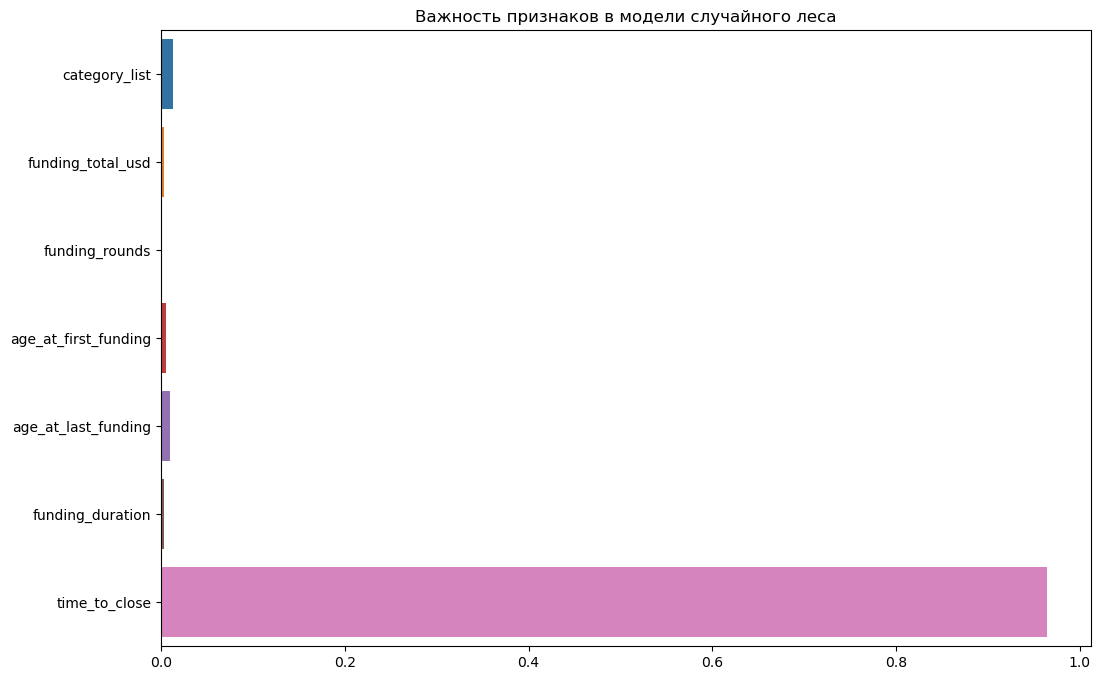

In [123]:

# Построим график важности признаков
plt.figure(figsize=(12,8))
sns.barplot(x=importances, y=feature_names)
plt.title('Важность признаков в модели случайного леса')
plt.show()

<a id="Вывод"></a>
# Шаг №9 Общие выводы

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
Предобработка данных:

Данные содержали пропуски, особенно в столбце с датой закрытия стартапов. Пропуски в числовых данных были заполнены средними значениями, что позволило сохранить строки, как требовалось по условиям.

Были созданы синтетические признаки, такие как возраст стартапа на момент первого и последнего финансирования, что добавило полезную информацию для анализа и моделирования.

Анализ данных (EDA):

Обнаружены выбросы в признаках, связанных с финансированием и количеством раундов, что может указывать на наличие стартапов с аномально высокими значениями.
Категориальные данные показали сильную несбалансированность, где большинство стартапов относятся к нескольким популярным категориям и странам.
Корреляционный анализ показал, что между числовыми признаками слабая корреляция, что снижает риск мультиколлинеарности.

Обучение моделей:

Логистическая регрессия предоставила базовый уровень точности. Модель проста и интерпретируема, однако показала ограниченные возможности в учете сложных зависимостей.

Случайный лес показал лучшую точность за счет учета нелинейных взаимосвязей между признаками. Это делает его более эффективной моделью для задачи предсказания успешности стартапов.
Анализ важности признаков:

Случайный лес выявил наиболее важные признаки для предсказания успешности стартапа, среди которых наибольшую значимость имеют объем финансирования, количество раундов финансирования и возраст стартапа.

Рекомендации:

Фокус на финансирование:

Стартапам с более высокими объемами привлеченных средств и большим количеством раундов финансирования удается успешнее продолжать свою деятельность. Инвесторам и основателям стоит уделять внимание планированию долгосрочного привлечения капитала.
Учет возрастных характеристик стартапа:

Возраст стартапа на момент первого и последнего финансирования также влияет на успешность. Основатели должны стремиться к активному развитию до и во время первых раундов привлечения средств.

Географическое и категориальное разнообразие:

Стартапы из определенных категорий и стран доминируют в наборе данных. Для будущих стартапов рекомендуется исследовать недостаточно охваченные категории и регионы для поиска новых возможностей на рынке.

Использование случайного леса:

Модель случайного леса показала лучшие результаты и может быть использована для точного предсказания успеха стартапов. Эта модель также позволяет выявить важные признаки для принятия решений.

Дальнейшая работа с выбросами:

Выбросы, особенно в данных о финансировании, могут быть результатом редких, но значительных успехов отдельных стартапов. Рекомендуется провести дальнейший анализ этих аномальных значений для более глубокого понимания их природы.

Итог:
Модель случайного леса является наиболее подходящей для предсказания успешности стартапов, а ключевыми факторами для успеха являются объем финансирования, количество раундов и возраст стартапа. Основателям стоит уделять внимание долгосрочным стратегиям по привлечению капитала и анализу своих позиций в контексте категорий и регионов.